<a href="https://colab.research.google.com/github/GGoodong/DL_for_AI/blob/main/week3/chapter02_mathematical_building_blocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# The mathematical building blocks of neural networks

## A first look at a neural network

**Loading the MNIST dataset in Keras**

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**The network architecture**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

**The compilation step**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**Preparing the image data**

In [ ]:
# Input으로 넣을때 1차원으로 펴는 것
# RGB scale(0~255)에 맞추어 스케일을 0~1사이로 줄이기 위해 255를 나눠준다. S) 정규화

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

**"Fitting" the model**

In [ ]:
# 60000/100 = 600, Epoch별 600번에 업데이트를 진행

model.fit(train_images, train_labels, epochs=5, batch_size=100)

Epoch 1/5
600/600 [==============================] - 6s 9ms/step - loss: 0.2496 - accuracy: 0.9272
Epoch 2/5
600/600 [==============================] - 4s 7ms/step - loss: 0.0998 - accuracy: 0.9703
Epoch 3/5
600/600 [==============================] - 5s 8ms/step - loss: 0.0663 - accuracy: 0.9801
Epoch 4/5
600/600 [==============================] - 4s 7ms/step - loss: 0.0486 - accuracy: 0.9852
Epoch 5/5
600/600 [==============================] - 4s 7ms/step - loss: 0.0352 - accuracy: 0.9897


**Using the model to make predictions**

In [ ]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 92ms/step


array([7.9279348e-09, 5.4428528e-09, 9.6532749e-06, 5.1803607e-05,
       1.0904070e-10, 2.2837438e-07, 3.3347728e-13, 9.9993199e-01,
       4.0501737e-07, 5.7649104e-06], dtype=float32)

In [ ]:
predictions[0].argmax()

7

In [ ]:
predictions[0][7]

0.999932

In [ ]:
test_labels[0]

7

**Evaluating the model on new data**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0772 - accuracy: 0.9764
test_acc: 0.9764000177383423


## Data representations for neural networks

### Scalars (rank-0 tensors)

In [ ]:
import numpy as np
x = np.array(12)
x

array(12)

In [ ]:
x.ndim

0

### Vectors (rank-1 tensors)

In [ ]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [ ]:
x.ndim

1

### Matrices (rank-2 tensors)

In [ ]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

### Rank-3 and higher-rank tensors

In [ ]:
# Try to create a 3D tensor object. (with any values you like)
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

### Key attributes

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.ndim

3

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
# unsigned int
train_images.dtype

dtype('uint8')

**Displaying the fourth digit**

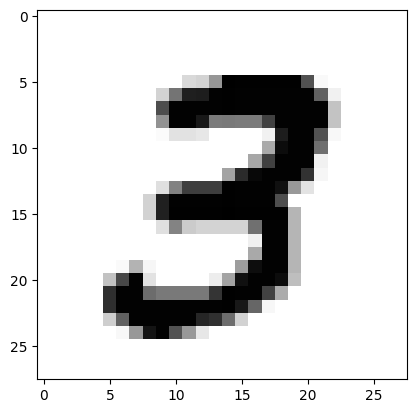

In [ ]:
import matplotlib.pyplot as plt
digit = train_images[7]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
train_labels[7]

3

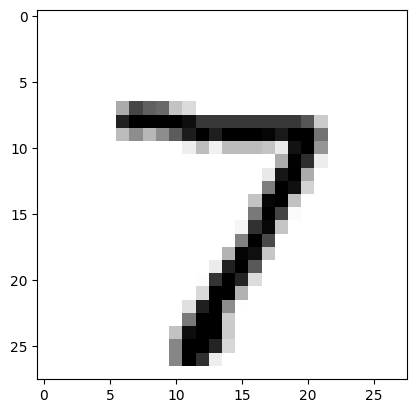

In [ ]:
# Try to visualize the 1st digit from minist test dataset(1st digit data = test_images[0])
import matplotlib.pyplot as plt
digit = test_images[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
test_labels[0]

7

### Manipulating tensors in NumPy

In [ ]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[:, 14:, 14:]

In [ ]:
my_slice = train_images[:, 7:-7, 7:-7]

In [ ]:
my_slice = test_images[:, 7:-7, 7:-7]

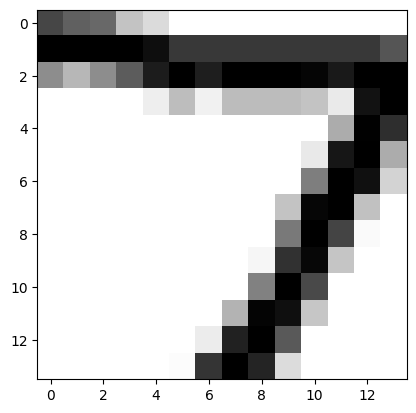

In [ ]:
# Try to manipulate and visualize the 1st digit data
digit = my_slice[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### The notion of data batches

In [ ]:
batch = train_images[:128]

In [ ]:
batch = train_images[128:256]

In [ ]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

### Real-world examples of data tensors

### Vector data

### Timeseries data or sequence data

### Image data

### Video data

## The gears of neural networks: tensor operations

### Element-wise operations

## assert

assert는 파이썬에서 프로그램의 특정 조건이 충족되었는지 확인하는 데 사용되는 키워드입니다. assert 문은 주어진 조건이 True인 경우 아무런 작업을 수행하지 않지만, 조건이 False로 평가되면 AssertionError 예외를 발생시킵니다.

즉, 예외처리를 위한 선제적 작업

In [ ]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [ ]:
import numpy as np

aa = np.array([[1, 2, 3, -1], [-1, -1, -2, 0]])
bb = naive_relu(aa)

In [ ]:
bb

array([[1, 2, 3, 0],
       [0, 0, 0, 0]])

In [ ]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [ ]:
naive_add(aa,bb)

array([[ 2,  4,  6, -1],
       [-1, -1, -2,  0]])

In [ ]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.01 s


In [ ]:
## Naive version의 코드가 더 느리다.

t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 2.74 s


### Broadcasting

In [ ]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [ ]:
X.shape

(32, 10)

In [ ]:
y.shape

(10,)

In [ ]:
# 행 방향 확장
y = np.expand_dims(y, axis=0)

In [ ]:
y.shape

(1, 10)

In [ ]:
## np.exapnd_dims() 설명
import numpy as np

a = np.array([1, 2, 3, 4, 5])  # 1차원 배열

# 1차원 배열을 2차원으로 확장
b = np.expand_dims(a, axis=0)  # 행 방향으로 확장
## b.shape는 (1, 5)가 됩니다.

c = np.expand_dims(a, axis=1)  # 열 방향으로 확장
## c.shape는 (5, 1)이 됩니다.

In [ ]:
Y = np.concatenate([y] * 32, axis=0)

In [ ]:
Y.shape

(32, 10)

In [ ]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [ ]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))

# np.maximum(x, y)은 높은 차원을 가지고 있는 배열의 차원으로 브로드캐스팅 된다.
z = np.maximum(x, y)

In [ ]:
z.shape

(64, 3, 32, 10)

### Tensor product

In [ ]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [ ]:
x.shape

(32,)

In [ ]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [ ]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [ ]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [ ]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### Tensor reshaping

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))

In [ ]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [ ]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [ ]:
# 전치
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

### Geometric interpretation of tensor operations

### A geometric interpretation of deep learning

## The engine of neural networks: gradient-based optimization

### What's a derivative?

### Derivative of a tensor operation: the gradient

### Stochastic gradient descent

### Chaining derivatives: The Backpropagation algorithm

#### The chain rule

#### Automatic differentiation with computation graphs

#### The gradient tape in TensorFlow

In [ ]:
import tensorflow as tf

# 변수 타입 선정(Float)
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)
grad_of_y_wrt_x


# '''
# <TensorFlow를 사용하여 변수 x에 대한 함수 y = 2 * x + 3의 도함수를 계산하는 예제>

# tf.Variable(0.): TensorFlow에서 float 타입의 변수를 생성, 초기값은 0. 이다. 경사하강법(Gradient Descent)을 통해 업데이트될 예정.
# tf.GradientTape() as tape: TensorFlow의 자동 미분 기능을 사용하기 위해 tf.GradientTape을 정의합니다. 이를 통해 y에 대한 x의 도함수를 계산.

# with tf.GradientTape() as tape: GradientTape 컨텍스트 내에서 수행되는 모든 연산이 테이프에 기록된다는 것을 의미합니다.
# y = 2 * x + 3: 함수 y = 2 * x + 3을 정의합니다. 이는 x의 일차함수입니다.

# grad_of_y_wrt_x = tape.gradient(y, x): tape.gradient() 메서드를 사용하여 y를 x에 대해 미분한 값을 계산합니다. 연산 그래프에 기록된 모든 연산에 대해 y의 각 변수에 대한 편미분을 계산.
# 따라서 grad_of_y_wrt_x에는 y를 x에 대해 미분한 값이 저장된다. 이 경우에는 2가 됨.
# '''

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [ ]:
X=tf.Variable(2.)
y=tf.Variable(1.)
with tf.GradientTape() as tape:
  z=X*X*y + X*y + 3*y
grad_of_z_wrt_Xy = tape.gradient(z, [X,y])

# x에 대한 미분, y에 대한 미분에 대한 대입값이 다르게 나오내
grad_of_z_wrt_Xy

[<tf.Tensor: shape=(), dtype=float32, numpy=5.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=9.0>]

In [ ]:
x=tf.constant(np.array([1.,4.,3.]).reshape(1,3),dtype=tf.float32)
W=tf.Variable(tf.random.uniform((3,2)),dtype=tf.float32)
b=tf.Variable(tf.zeros((2,)),dtype=tf.float32)

with tf.GradientTape() as tape:
  z=tf.matmul(x, W)+b
grad_of_z_wrt_Wb = tape.gradient(z, [W,b])
grad_of_z_wrt_Wb

[<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[1., 1.],
        [4., 4.],
        [3., 3.]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 1.], dtype=float32)>]

In [ ]:
x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)
grad_of_y_wrt_x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

In [ ]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])
grad_of_y_wrt_W_and_b

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[1.4812895, 1.4812895],
        [0.8259121, 0.8259121]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]

## Looking back at our first example

In [ ]:
# Train data flatten

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [ ]:
# 옵티마이저에 따라 성능이 많이 달라짐. 여기선 rmsprop이 best
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.2660 - accuracy: 0.9237
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1079 - accuracy: 0.9679
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0704 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 7s 14ms/step - loss: 0.0512 - accuracy: 0.9844
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0374 - accuracy: 0.9888


In [ ]:
test_digits = test_images[:10]

In [ ]:
y_pred=model.predict(test_digits)

1/1 [==============================] - 0s 29ms/step


In [ ]:
# (중요)확률로 나타난 예측을 클래스 레이블로 변환
y_pred_classes = np.argmax(y_pred, axis=1)

In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_pred_classes, test_labels[:10])
acc

1.0

### Reimplementing our first example from scratch in TensorFlow

#### A simple Dense class

In [ ]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

#### A simple Sequential class

In [ ]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [ ]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

#### A batch generator

In [ ]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### Running one training step

In [ ]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [ ]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [ ]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### The full training loop

In [ ]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

Epoch 0
loss at batch 0: 4.38
loss at batch 100: 2.26
loss at batch 200: 2.22
loss at batch 300: 2.09
loss at batch 400: 2.21
Epoch 1
loss at batch 0: 1.93
loss at batch 100: 1.91
loss at batch 200: 1.85
loss at batch 300: 1.73
loss at batch 400: 1.83
Epoch 2
loss at batch 0: 1.61
loss at batch 100: 1.61
loss at batch 200: 1.53
loss at batch 300: 1.44
loss at batch 400: 1.52
Epoch 3
loss at batch 0: 1.36
loss at batch 100: 1.37
loss at batch 200: 1.26
loss at batch 300: 1.23
loss at batch 400: 1.29
Epoch 4
loss at batch 0: 1.15
loss at batch 100: 1.18
loss at batch 200: 1.06
loss at batch 300: 1.06
loss at batch 400: 1.12
Epoch 5
loss at batch 0: 1.00
loss at batch 100: 1.03
loss at batch 200: 0.92
loss at batch 300: 0.94
loss at batch 400: 1.00
Epoch 6
loss at batch 0: 0.89
loss at batch 100: 0.92
loss at batch 200: 0.81
loss at batch 300: 0.84
loss at batch 400: 0.91
Epoch 7
loss at batch 0: 0.81
loss at batch 100: 0.84
loss at batch 200: 0.73
loss at batch 300: 0.77
loss at batch 40

### Evaluating the model

In [ ]:
model.weights

[<tf.Variable 'Variable:0' shape=(784, 512) dtype=float32, numpy=
 array([[0.00579476, 0.09324852, 0.02909958, ..., 0.04661202, 0.01196997,
         0.00186543],
        [0.06643344, 0.08246022, 0.01949145, ..., 0.02951961, 0.08745082,
         0.04375849],
        [0.01784479, 0.04877069, 0.01439898, ..., 0.08962246, 0.0562616 ,
         0.08688786],
        ...,
        [0.08303113, 0.08552562, 0.08715864, ..., 0.0111804 , 0.03505161,
         0.01589912],
        [0.07320645, 0.06733682, 0.02694318, ..., 0.0260865 , 0.08584964,
         0.0528554 ],
        [0.01950457, 0.00421224, 0.01750627, ..., 0.00220265, 0.07028607,
         0.03464035]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(512,) dtype=float32, numpy=
 array([-5.28444257e-03, -1.90435583e-03, -2.80333945e-04,  3.60930478e-03,
        -8.41048919e-03, -1.76196394e-03, -4.51967726e-03, -4.38238587e-03,
         4.21627378e-03,  7.39471614e-03,  2.87239137e-03, -8.65020137e-03,
        -3.05542164e-03,  1.95595762e

In [ ]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

accuracy: 0.82


## Summary